In [4]:
import os
os.chdir(r"C:\Users\hp\Documents\ML_Projects\Delhi_Infrastructure_Risk_AI")
print(os.getcwd())


C:\Users\hp\Documents\ML_Projects\Delhi_Infrastructure_Risk_AI


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [6]:
df = pd.read_csv("data/processed/infrastructure_priority_index.csv")
df.head()


,asset_id,is_flyover,SAI,TSI,FEI,MNS,CDI,risk_score,risk_label,predicted_risk,predicted_flood_impact,risk_score_norm,flood_impact_norm,D_CIPI,priority_level
0,1303,0,0.392733,0.881203,0.865295,0.550669,0.746803,0.674385,Medium,Medium,0.954025,1.000000,1.000000,0.898254,High
1,1418,0,0.362021,0.750962,0.874145,0.736454,0.018294,0.626266,Medium,Medium,0.864936,0.914014,0.886920,0.854068,High
2,3557,0,0.368688,0.939134,0.766477,0.519927,0.471696,0.638583,Medium,Medium,0.863693,0.936023,0.885342,0.837911,High
3,2211,0,0.706301,0.591059,0.606604,0.896641,0.044627,0.648034,Medium,Medium,0.731415,0.952911,0.717441,0.834831,High
4,1265,0,0.379237,0.613926,0.972012,0.678219,0.208832,0.622430,Medium,Medium,0.880907,0.907160,0.907191,0.832058,High


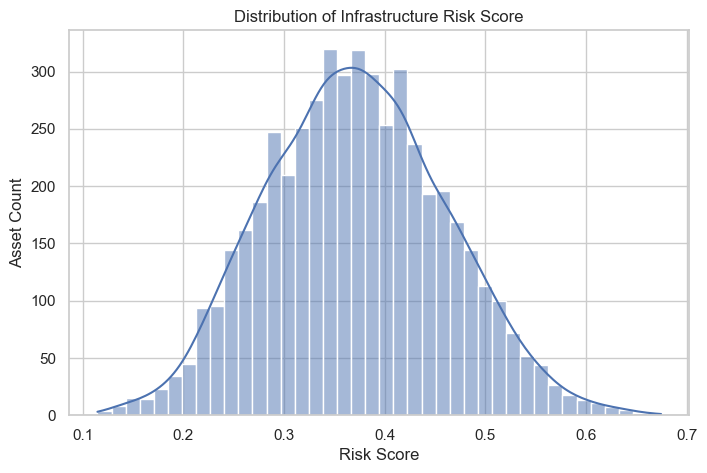

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["risk_score"], bins=40, kde=True)
plt.title("Distribution of Infrastructure Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Asset Count")
plt.show()


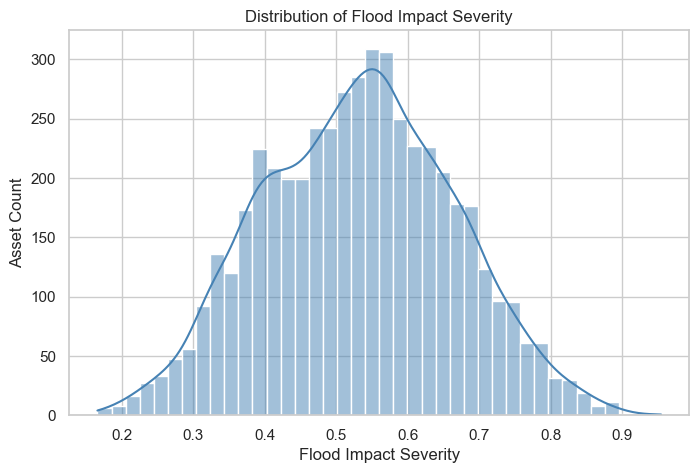

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["predicted_flood_impact"], bins=40, kde=True, color="steelblue")
plt.title("Distribution of Flood Impact Severity")
plt.xlabel("Flood Impact Severity")
plt.ylabel("Asset Count")
plt.show()


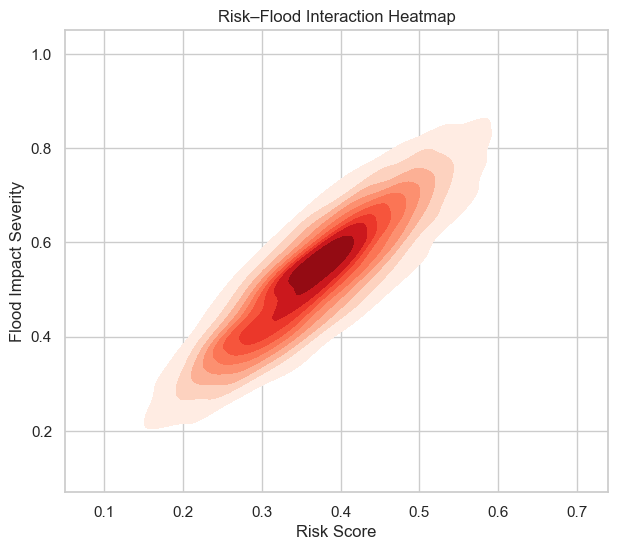

In [9]:
plt.figure(figsize=(7,6))

sns.kdeplot(
    x=df["risk_score"],
    y=df["predicted_flood_impact"],
    fill=True,
    cmap="Reds",
    thresh=0.05
)

plt.xlabel("Risk Score")
plt.ylabel("Flood Impact Severity")
plt.title("Risk–Flood Interaction Heatmap")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_13116\768641414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


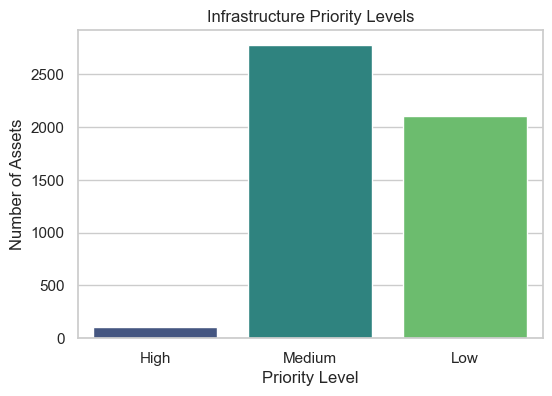

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="priority_level",
    data=df,
    order=["High", "Medium", "Low"],
    palette="viridis"
)
plt.title("Infrastructure Priority Levels")
plt.xlabel("Priority Level")
plt.ylabel("Number of Assets")
plt.show()


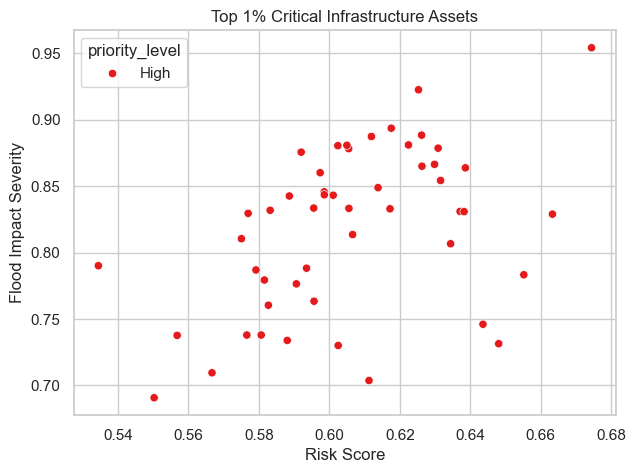

In [11]:
top_critical = df.nlargest(int(0.01 * len(df)), "D_CIPI")

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=top_critical["risk_score"],
    y=top_critical["predicted_flood_impact"],
    hue=top_critical["priority_level"],
    palette="Set1"
)

plt.title("Top 1% Critical Infrastructure Assets")
plt.xlabel("Risk Score")
plt.ylabel("Flood Impact Severity")
plt.show()


In [12]:
os.makedirs("outputs/figures", exist_ok=True)

plt.figure(figsize=(7,6))
sns.kdeplot(
    x=df["risk_score"],
    y=df["predicted_flood_impact"],
    fill=True,
    cmap="Reds"
)
plt.xlabel("Risk Score")
plt.ylabel("Flood Impact Severity")
plt.title("Risk–Flood Interaction Heatmap")
plt.savefig("outputs/figures/risk_flood_heatmap.png", dpi=300)
plt.close()
